# CAPSTONE PROJECT - BATTLE OF NEIGHBORHOOD - DUBAI

### Importing the entire suite of Packages required for our Analysis -

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Import the Dubai Location data with Sectors and Community

In [3]:
url = 'https://raw.githubusercontent.com/roydebmalya/Coursera_Capstone/master/DUBAI_LATLONG_2019.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [4]:
df.head()

,Sector,Community,Population_2018,Population_2019,Lat,Long
0,1,Abu Hail,16905,17240,25.285718,55.329000
1,1,Al Dhagaya,15453,15899,25.272634,55.300466
2,1,Al Baraha,24373,24747,25.282144,55.318292
3,1,Rigga Al Buteen,2766,2841,25.260219,55.318796
4,1,Al Khabaisi,1952,1992,25.265629,55.334682


In [5]:
print('The dataframe has {} Sectors and {} Communities.'.format(
        len(df['Sector'].unique()),
        df.shape[0]
    )
)

The dataframe has 9 Sectors and 226 Communities.


### Use geopy library to get the latitude and longitude values of Dubai.


In [6]:
address = 'Dubai'

geolocator = Nominatim(user_agent="DUB_EXPLR")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Dubai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Dubai are 25.0750095, 55.18876088183319.


### A Quick Map Visualisation to show the Concentration of population in Various Areas in Dubai -

In [7]:
# create map of Dubai using latitude and longitude values
colordict = {1: 'blue', 2: 'lightgreen', 3: 'orange', 4: 'lightblue', 5: 'yellow', 6: 'red', 7: 'pink', 8: 'darkgreen', 9: 'purple'}


map_Dubai = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for Lat, Long, Sector, Community,Pop in zip(df['Lat'], df['Long'], df['Sector'], df['Community'],df['Population_2019']):
    #label = '{}, {},{}'.format(Community, Sector,Pop)
    #label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [Lat, Long],
        radius=Pop*.0001,
        popup=('Community: ' + str(Community).capitalize() + '<br>'
                 'Sector: ' + str(Sector) + '<br>'
                 'Population(2019): ' + str(Pop)
                ),
        color='black',
        fill=True,
        fill_color=colordict[Sector],
        fill_opacity=0.7,
        parse_html=False).add_to(map_Dubai)  
    
map_Dubai

# EDA - Exploratory Data Analysis

In [8]:
df.describe()

,Sector,Population_2018,Population_2019,Lat,Long
count,226.000000,226.000000,226.000000,226.000000,226.000000
mean,4.491150,14125.115044,14849.115044,25.119400,55.328790
std,2.594423,24297.847784,24883.566435,0.147238,0.145003
min,1.000000,0.000000,0.000000,24.646905,54.908949
25%,2.000000,419.250000,637.250000,25.030474,55.240360
50%,3.000000,5860.500000,6586.000000,25.158506,55.321148
75%,6.000000,16723.500000,17811.500000,25.241415,55.403870
max,9.000000,197838.000000,196316.000000,25.306360,56.125597


### Finding No of Communities per Sector in Dubai

In [9]:
Sector_Count=df['Sector'].value_counts().to_frame()

In [10]:
Sector_Count.rename(columns={'Sector': 'No_of_Community'}, inplace=True)


In [11]:
Sector_Count.index.name='Sector'

In [12]:
Sector_Count

,No_of_Community
Sector,
3,57
2,35
6,32
9,28
1,23
5,18
8,16
4,10
7,7


Clearly Sector 3 has to most no of Sub-Communities Compared to Others

## Visualising -

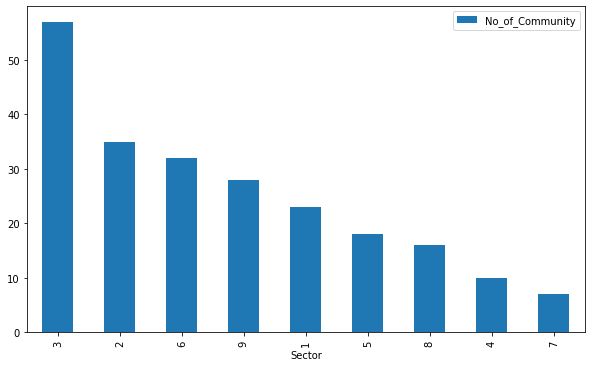

In [13]:
import matplotlib.pyplot as plt

Sector_Count.plot(kind='bar', figsize=(10, 6))


plt.show()

In [14]:
df_pop = df[['Sector','Community','Population_2018','Population_2019']]

In [15]:
df_group_one = df_pop.groupby(['Sector'],as_index=False).sum()

In [16]:
df_group_one['prc_grw']=(df_group_one.Population_2019-df_group_one.Population_2018)/df_group_one.Population_2018
df_group_one

,Sector,Population_2018,Population_2019,prc_grw
0,1,460663,471955,0.024512
1,2,629957,661042,0.049345
2,3,1175162,1248002,0.061983
3,4,77400,83450,0.078165
4,5,425563,430937,0.012628
5,6,363594,395780,0.088522
6,7,12681,13910,0.096917
7,8,38885,40836,0.050174
8,9,8371,9988,0.193167


Clearly, from the above analysis it is evident that Sector-9 has seen the most % growth in Population in 2019(19.32%) and Sector-5 has seen the Least growth (1.26%). Also its also clear that Sector-3 has the highest Population amongst all the Sectors in Dubai and has seen 6.2% growth in Population from 2018 to 2019

## Visualising the change in Population in Different Sectors over years 2018 and 2019

In [17]:
df_2019=df_group_one[['Sector','Population_2018','Population_2019']]

In [18]:
df_2019.set_index('Sector', inplace=True)


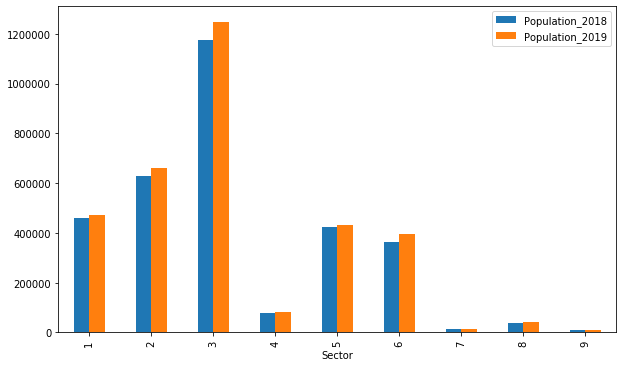

In [19]:
import matplotlib.pyplot as plt

df_2019.plot(kind='bar', figsize=(10, 6))


plt.show()

## Visualizing further which Sector displayed the most Growth in Population

In [20]:
df_growth=df_group_one[['Sector','prc_grw']]


In [21]:
df_growth.sort_values(by='prc_grw', ascending=True, inplace=True)


C:\Users\debmalya.roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_growth.set_index('Sector', inplace=True)


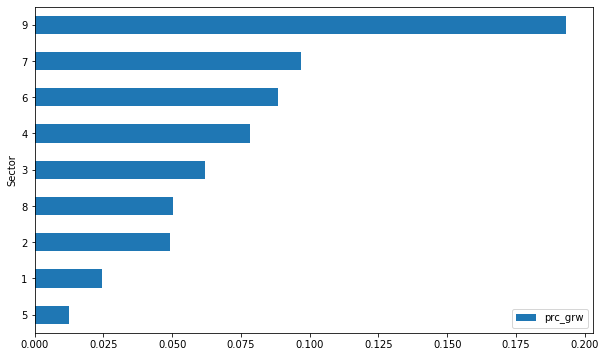

In [23]:
import matplotlib.pyplot as plt

df_growth.plot(kind='barh', figsize=(10, 6))


plt.show()

#### Dubai is rapidly expanding on the Outskirts around Sector 9, 7 and 6. But Sector 3 continues to be the Sector with Highest population and steady grouwth in population. 

#### We shall be exploring SECTOR 3 areas further in Detail and perform Clustering

In [24]:
Sector3_data = df[df['Sector'] == 3].reset_index(drop=True)
Sector3_data.head()

,Sector,Community,Population_2018,Population_2019,Lat,Long
0,3,Al Bada'a,54338,56734,25.224995,55.268193
1,3,Al Barsha 1,35469,39451,25.111286,55.194680
2,3,Al Barsha 2,14815,15523,25.100175,55.213526
3,3,Al Barsha 3,13990,14601,25.095581,55.196543
4,3,Al Hamriya,33421,36738,25.260435,55.303978


In [25]:
Sector3_data.describe()

,Sector,Population_2018,Population_2019,Lat,Long
count,57.0,57.000000,57.000000,57.000000,57.000000
mean,3.0,20616.877193,21894.771930,25.176511,55.244732
std,0.0,24600.249416,25286.740039,0.059023,0.050676
min,3.0,2.000000,2.000000,25.057311,55.139549
25%,3.0,5592.000000,6126.000000,25.132472,55.206693
50%,3.0,13990.000000,14901.000000,25.180129,55.245391
75%,3.0,25360.000000,26656.000000,25.224995,55.285143
max,3.0,158543.000000,159978.000000,25.267278,55.330353


In [27]:
Sector3_data.sort_values(by='Population_2019', ascending=False, inplace=False)


,Sector,Community,Population_2018,Population_2019,Lat,Long
21,3,Al Quoz Industrial Area 2,158543,159978,25.133061,55.245391
8,3,AL KARAMA,70558,75066,25.249106,55.306160
45,3,Dubai Marina,55052,61047,25.081027,55.140318
0,3,Al Bada'a,54338,56734,25.224995,55.268193
32,3,Al Souq Al Kabeer,46929,51012,25.261991,55.293812
25,3,AL RAFFA,42904,47140,25.255643,55.288011
37,3,Emirates Hills 1,37067,40586,25.057311,55.157449
18,3,Al Quoz 3,40541,40553,25.158636,55.240195
12,3,Al Mankhool,37400,40091,25.250262,55.295694
1,3,Al Barsha 1,35469,39451,25.111286,55.194680


### Selecting Burj Khalifa as the Center of Sector 3 here

In [26]:
address = 'Burj Khalifa, Dubai'

geolocator = Nominatim(user_agent="DUBAI_sec3")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Burj Khalifa are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Burj Khalifa are 25.197030599999998, 55.274221386781605.


In [2]:
### Ploting Sector 3 using Folium

In [33]:
map_Sec3 = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for Lat, Long, Sector, Community,Pop in zip(Sector3_data['Lat'], Sector3_data['Long'], Sector3_data['Sector'], Sector3_data['Community'],Sector3_data['Population_2019']):
    #label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [Lat, Long],
        radius=Pop*0.0001,
        popup=('Community: ' + str(Community).capitalize() + '<br>'
                 'Sector: ' + str(Sector) + '<br>'
                 'Population(2019): ' + str(Pop)
                ),
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Sec3)  
    
map_Sec3

### using FourSquare API data to get the Venue details for Sector 3

Define Foursquare Credentials and Version

In [40]:
CLIENT_ID = '1WHQEEJBGHFFE4OJ53VVMJSHP5UDNADQU3TUOX2E1ZBWFVLJ' # your Foursquare ID
CLIENT_SECRET = 'BVYKCTVNYYHZ554PAOOIYMWDCWPR0YDL2EC1AVRFZ10LD5J2' # your Foursquare Secret
VERSION = '20200609' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1WHQEEJBGHFFE4OJ53VVMJSHP5UDNADQU3TUOX2E1ZBWFVLJ
CLIENT_SECRET:BVYKCTVNYYHZ554PAOOIYMWDCWPR0YDL2EC1AVRFZ10LD5J2


In [41]:
LIMIT=1000;
def getNearbyVenues(names, latitudes, longitudes, radius=600):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [42]:
Sector3Dub_venues = getNearbyVenues(names=Sector3_data['Community'],
                                   latitudes=Sector3_data['Lat'],
                                   longitudes=Sector3_data['Long']
                                  )

Al Bada'a
Al Barsha 1
Al Barsha 2
Al Barsha 3
Al Hamriya
Al Hudaiba
Al Jaddaf
Al Jaffiliya
AL KARAMA
Business Bay
Al Kifaf
Al Manara
Al Mankhool
AL MERKADH
Trade Center 1
Trade Center 2
Al Quoz 1
Al Quoz 2
Al Quoz 3
Al Quoz 4
Al Quoz Industrial Area 1
Al Quoz Industrial Area 2
Al Quoz Industrial Area 3
Al Quoz Industrial Area 4
Al Wasl
AL RAFFA
Al Shindagha
Al Safa 1
Al Safa 2
Al Satwa
Al Sufouh 1
Al Sufouh 2
Al Souq Al Kabeer
Village Rabie Sahra'a
Jebel Ali Racecourse
Emirates Hills 2
Emirates Hills 3
Emirates Hills 1
Burj Khalifa
Jumeira Island 2
Jumeira 1
Jumeira 2
Jumeira 3
The World Islands
Dubai Healthcare City
Dubai Marina
Palm Jumeirah
Jumeirah Bay Island
Umm Al Sheif
Umm Hurair 1
Umm Hurair 2
Umm Suqeim 1
Umm Suqeim 2
Umm Suqeim 3
Oud Metha
Za'abeel 1
Za'abeel 2


### Getting Shape of the Extracted FourSquare Data top 5 rows of the Data

In [43]:
print(Sector3Dub_venues.shape)
Sector3Dub_venues.head()


(1480, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Al Bada'a,25.224995,55.268193,Al Boom Diving Club,25.227329,55.266449,Pool
1,Al Bada'a,25.224995,55.268193,Hyatt Place Dubai/Al Rigga,25.226127,55.262599,Hotel
2,Al Bada'a,25.224995,55.268193,Walid Mohd. Bakhet Grocery بقالة وليد محمد بخيت,25.229654,55.265776,Grocery Store
3,Al Bada'a,25.224995,55.268193,The Ballet Center,25.228702,55.263938,Dance Studio
4,Al Bada'a,25.224995,55.268193,Karachi Darbar كراتشي دربار,25.226369,55.273223,Indian Restaurant


In [44]:
Sector3Dub_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
AL KARAMA,100,100,100,100,100,100
AL MERKADH,1,1,1,1,1,1
AL RAFFA,40,40,40,40,40,40
Al Bada'a,11,11,11,11,11,11
Al Barsha 1,60,60,60,60,60,60
Al Barsha 2,5,5,5,5,5,5
Al Barsha 3,4,4,4,4,4,4
Al Hamriya,54,54,54,54,54,54
Al Hudaiba,18,18,18,18,18,18


In [45]:
print('There are {} uniques categories.'.format(len(Sector3Dub_venues['Venue Category'].unique())))

There are 214 uniques categories.


### Analyze Each Neighbourhood - OneHot Encoding to Group each Community by Venues

In [46]:
# one hot encoding
DubaiSec3_onehot = pd.get_dummies(Sector3Dub_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
DubaiSec3_onehot['Neighborhood'] = Sector3Dub_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [DubaiSec3_onehot.columns[-1]] + list(DubaiSec3_onehot.columns[:-1])
DubaiSec3_onehot = DubaiSec3_onehot[fixed_columns]

DubaiSec3_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bakery,Bar,Basketball Court,Beach,Beach Bar,Bed & Breakfast,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Buffet,Building,Burger Joint,Business Service,Cafeteria,Café,Camera Store,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market,Flower Shop,Fondue Restaurant,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Lingerie Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Nail Salon,National Park,New American Restaurant,Night Market,Nightclub,Noodle House,North Indian Restaurant,Opera House,Paintball Field,Pakistani Restaurant,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pier,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Pub,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shawarma Place,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Syrian Restaurant,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Water Park,Waterfront,Wine Bar,Women's Store,Yoga Studio,Zoo
0,Al Bada'a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Al Bada'a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [47]:
DubaiSec3_onehot.shape

(1480, 215)

In [48]:
DubSec3_grouped = DubaiSec3_onehot.groupby('Neighborhood').mean().reset_index()
DubSec3_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bakery,Bar,Basketball Court,Beach,Beach Bar,Bed & Breakfast,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Buffet,Building,Burger Joint,Business Service,Cafeteria,Café,Camera Store,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market,Flower Shop,Fondue Restaurant,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Lingerie Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Nail Salon,National Park,New American Restaurant,Night Market,Nightclub,Noodle House,North Indian Restaurant,Opera House,Paintball Field,Pakistani Restaurant,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pier,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Pub,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shawarma Place,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Syrian Restaurant,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Water Park,Waterfront,Wine Bar,Women's Store,Yoga Studio,Zoo
0,AL KARAMA,0.00,0.010000,0.010000,0.00,0.010000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.030000,0.010000,0.000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.00,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.00,0.00,0.020000,0.00,0.00,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.010000,0.000000,0.010000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.010000,0.00,0.030000,0.020000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.010000,0.01,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000

In [49]:
DubSec3_grouped.shape

(56, 215)

### Getting top 5 Venues for each Community (Neighborhood)

In [50]:
num_top_venues = 5

for hood in DubSec3_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = DubSec3_grouped[DubSec3_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----AL KARAMA----
                       venue  freq
0          Indian Restaurant  0.26
1                 Restaurant  0.06
2           Asian Restaurant  0.05
3         Italian Restaurant  0.04
4  Middle Eastern Restaurant  0.03


----AL MERKADH----
               venue  freq
0   Business Service   1.0
1  Afghan Restaurant   0.0
2       Perfume Shop   0.0
3       Night Market   0.0
4          Nightclub   0.0


----AL RAFFA----
                venue  freq
0               Hotel  0.20
1   Indian Restaurant  0.15
2  Chinese Restaurant  0.05
3                 Pub  0.05
4           Nightclub  0.05


----Al Bada'a----
                       venue  freq
0                       Park  0.18
1  Middle Eastern Restaurant  0.09
2                       Pool  0.09
3                       Café  0.09
4                 Restaurant  0.09


----Al Barsha 1----
                       venue  freq
0                      Hotel  0.20
1            Bed & Breakfast  0.07
2  Middle Eastern Restaurant  0.05
3       Pa

In [51]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Getting Top 10 common venues by Each Neighborhood

In [52]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = DubSec3_grouped['Neighborhood']

for ind in np.arange(DubSec3_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(DubSec3_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AL KARAMA,Indian Restaurant,Restaurant,Asian Restaurant,Italian Restaurant,Seafood Restaurant,Fast Food Restaurant,North Indian Restaurant,Bakery,Middle Eastern Restaurant,Gym
1,AL MERKADH,Business Service,Zoo,Food & Drink Shop,German Restaurant,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint
2,AL RAFFA,Hotel,Indian Restaurant,Nightclub,Restaurant,Chinese Restaurant,Pub,Lounge,Bakery,North Indian Restaurant,Gastropub
3,Al Bada'a,Park,Hotel,Tailor Shop,Middle Eastern Restaurant,Grocery Store,Restaurant,Pool,Dance Studio,Café,Indian Restaurant
4,Al Barsha 1,Hotel,Bed & Breakfast,Middle Eastern Restaurant,Pakistani Restaurant,Indian Restaurant,Turkish Restaurant,Sandwich Place,Asian Restaurant,Breakfast Spot,Restaurant


### Clustering Neighborhoods using K-means

In [53]:
# set number of clusters
kclusters = 5

DubSec3_grouped_clustering = DubSec3_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(DubSec3_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 1, 1, 1, 3, 1, 1, 1, 1])

### Mearging the Cluster labels with Sector 3 data 

In [54]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

DubSec3_merged = Sector3_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
DubSec3_merged = DubSec3_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Community')

DubSec3_merged.head() # check the last columns!

,Sector,Community,Population_2018,Population_2019,Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Al Bada'a,54338,56734,25.224995,55.268193,1.0,Park,Hotel,Tailor Shop,Middle Eastern Restaurant,Grocery Store,Restaurant,Pool,Dance Studio,Café,Indian Restaurant
1,3,Al Barsha 1,35469,39451,25.111286,55.194680,1.0,Hotel,Bed & Breakfast,Middle Eastern Restaurant,Pakistani Restaurant,Indian Restaurant,Turkish Restaurant,Sandwich Place,Asian Restaurant,Breakfast Spot,Restaurant
2,3,Al Barsha 2,14815,15523,25.100175,55.213526,3.0,Grocery Store,Coffee Shop,Convenience Store,Zoo,Food & Drink Shop,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop
3,3,Al Barsha 3,13990,14601,25.095581,55.196543,1.0,Shopping Mall,Breakfast Spot,Bakery,Gluten-free Restaurant,German Restaurant,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop
4,3,Al Hamriya,33421,36738,25.260435,55.303978,1.0,Hotel,Café,Middle Eastern Restaurant,Ice Cream Shop,Indian Restaurant,Restaurant,Burger Joint,Historic Site,Lebanese Restaurant,Persian Restaurant


In [55]:
DubSec3_merged.dropna(subset = ["Cluster Labels"], inplace=True)

### Plotting the Communities of Sector 3 with Cluster Labels.

In [63]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,pop in zip(DubSec3_merged['Lat'], DubSec3_merged['Long'], DubSec3_merged['Community'], DubSec3_merged['Cluster Labels'], DubSec3_merged['Population_2019']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
       radius=8,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

## RESULTS -

### Cluster 0: Business Neighborhood

In [65]:
CLUSTER0=DubSec3_merged.loc[DubSec3_merged['Cluster Labels'] == 0, DubSec3_merged.columns[[1] + list(range(5, DubSec3_merged.shape[1]))]]
CLUSTER0

,Community,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,AL MERKADH,55.285143,0.0,Business Service,Zoo,Food & Drink Shop,German Restaurant,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint
34,Jebel Ali Racecourse,55.192021,0.0,Business Service,Supermarket,Turkish Restaurant,Zoo,Food & Drink Shop,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop


### Cluster 1: Social Hub-Bub Locale with Residential

In [67]:
CLUSTER1=DubSec3_merged.loc[DubSec3_merged['Cluster Labels'] == 1, DubSec3_merged.columns[[1] + list(range(5, DubSec3_merged.shape[1]))]]
CLUSTER1

,Community,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Al Bada'a,55.268193,1.0,Park,Hotel,Tailor Shop,Middle Eastern Restaurant,Grocery Store,Restaurant,Pool,Dance Studio,Café,Indian Restaurant
1,Al Barsha 1,55.194680,1.0,Hotel,Bed & Breakfast,Middle Eastern Restaurant,Pakistani Restaurant,Indian Restaurant,Turkish Restaurant,Sandwich Place,Asian Restaurant,Breakfast Spot,Restaurant
3,Al Barsha 3,55.196543,1.0,Shopping Mall,Breakfast Spot,Bakery,Gluten-free Restaurant,German Restaurant,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop
4,Al Hamriya,55.303978,1.0,Hotel,Café,Middle Eastern Restaurant,Ice Cream Shop,Indian Restaurant,Restaurant,Burger Joint,Historic Site,Lebanese Restaurant,Persian Restaurant
5,Al Hudaiba,55.280001,1.0,Hotel,Dessert Shop,Lounge,Convenience Store,Cocktail Bar,Nightclub,Café,Smoke Shop,South American Restaurant,Grocery Store
6,Al Jaddaf,55.330353,1.0,Hotel,Donut Shop,Movie Theater,Hotel Pool,Gym,Zoo,Food & Drink Shop,Garden,Gaming Cafe,Furniture / Home Store
7,Al Jaffiliya,55.284548,1.0,Bakery,Seafood Restaurant,Coffee Shop,Convenience Store,Filipino Restaurant,Grocery Store,Asian Restaurant,Indian Restaurant,Cafeteria,Frozen Yogurt Shop
8,AL KARAMA,55.306160,1.0,Indian Restaurant,Restaurant,Asian Restaurant,Italian Restaurant,Seafood Restaurant,Fast Food Restaurant,North Indian Restaurant,Bakery,Middle Eastern Restaurant,Gym
9,Business Bay,55.272799,1.0,Hotel,Coffee Shop,Lounge,Italian Restaurant,Restaurant,Middle Eastern Restaurant,Gym / Fitness Center,Speakeasy,Grocery Store,Cocktail Bar
10,Al Kifaf,55.296304,1.0,Park,Hotel,Sandwich Place,Coffee Shop,Middle Eastern Restaurant,Restaurant,Fast Food Restaurant,Monument / Landmark,Metro Station,Track


In [70]:
print(CLUSTER1.shape)

(47, 13)


### Cluster 2: Industrial Neighborhood – Bulk Retailers, Car Retail etc.

In [71]:
CLUSTER2=DubSec3_merged.loc[DubSec3_merged['Cluster Labels'] == 2, DubSec3_merged.columns[[1] + list(range(5, DubSec3_merged.shape[1]))]]
CLUSTER2

,Community,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Al Quoz 2,55.273032,2.0,Food Truck,Zoo,Gluten-free Restaurant,German Restaurant,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint


### 	Cluster 3: Upmarket Residential Locale (less commercialisation)

In [72]:
CLUSTER3=DubSec3_merged.loc[DubSec3_merged['Cluster Labels'] == 3, DubSec3_merged.columns[[1] + list(range(5, DubSec3_merged.shape[1]))]]
CLUSTER3

,Community,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Al Barsha 2,55.213526,3.0,Grocery Store,Coffee Shop,Convenience Store,Zoo,Food & Drink Shop,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop
48,Umm Al Sheif,55.205302,3.0,Coffee Shop,Spa,Steakhouse,Supermarket,French Restaurant,Café,Shop & Service,Salon / Barbershop,Fondue Restaurant,Gaming Cafe
52,Umm Suqeim 2,55.206693,3.0,Coffee Shop,Playground,Cosmetics Shop,Cafeteria,Café,Shopping Mall,Gym,Salon / Barbershop,Convenience Store,Health & Beauty Service
55,Za'abeel 1,55.305703,3.0,Business Service,Restaurant,Grocery Store,Shopping Mall,Coffee Shop,Zoo,Fondue Restaurant,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop
56,Za'abeel 2,55.299149,3.0,Martial Arts Dojo,Coffee Shop,Zoo,Fondue Restaurant,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint


### 	Cluster 4: Beach Island Neighborhood (Upcoming)

In [73]:
CLUSTER4=DubSec3_merged.loc[DubSec3_merged['Cluster Labels'] == 4, DubSec3_merged.columns[[1] + list(range(5, DubSec3_merged.shape[1]))]]
CLUSTER4

,Community,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,Jumeira Island 2,55.225017,4.0,Beach,Playground,Zoo,Fondue Restaurant,Gastropub,Garden,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint
